In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import the required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

#### Read the test data for both the travel and the survey data

In [ ]:
travel_test_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Classification/Hackathon/Traveldata_test.csv')
survey_test_data = pd.read_csv("/content/drive/MyDrive/Machine Learning/Classification/Hackathon/Surveydata_test.csv")

In [ ]:
travel_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB


In [ ]:
survey_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_Comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_Time_Convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_Location        35590 non-null  object
 6   Onboard_Wifi_Service     35590 non-null  object
 7   Onboard_Entertainment    35594 non-null  object
 8   Online_Support           35576 non-null  object
 9   Ease_of_Online_Booking   35584 non-null  object
 10  Onboard_Service          32730 non-null  object
 11  Legroom                  35577 non-null  object
 12  Baggage_Handling         35562 non-null  object
 13  CheckIn_Service          35580 non-null  object
 14  Cleanliness              35600 non-nul

In [ ]:
travel_test_data.shape, survey_test_data.shape

((35602, 9), (35602, 16))

Both the Traveldata and the SurveyData for the test data has the the same number of unique IDs (35602), hence we can merge the two datasets on the ID

In [ ]:
test_data = pd.merge(travel_test_data,survey_test_data, on = 'ID')

### **Checking the data types of the columns for the test_data dataset**

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

In [ ]:
num_cols = ['Age',"Travel_Distance",'Departure_Delay_in_Mins',"Arrival_Delay_in_Mins"]
cat_cols = ["Type_Travel", "Customer_Type", "Arrival_Time_Convenient", "Catering","Onboard_Service",'Baggage_Handling', "Online_Support","Legroom", "CheckIn_Service", "Gender", "Ease_of_Online_Booking", "Seat_Comfort","Platform_Location", "Onboard_Wifi_Service", "Onboard_Entertainment", "Cleanliness", "Online_Boarding"]

In [ ]:
imputer_mode = SimpleImputer(strategy="most_frequent")
test_data[num_cols] = imputer_mode.fit_transform(test_data[num_cols])
test_data[cat_cols] = imputer_mode.fit_transform(test_data[cat_cols])

In [ ]:
test_data.isnull().sum()

ID                         0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

#### Read the the train data for both the travel and survey data

In [ ]:
travel_train_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Classification/Hackathon/Traveldata_train.csv')
survey_train_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Classification/Hackathon/Surveydata_train.csv')

#### Check the first 5 rows of the train datasets

In [ ]:
travel_train_data.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
survey_train_data.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


#### Understand the shape of the train datasets

In [ ]:
travel_train_data.shape,survey_train_data.shape

((94379, 9), (94379, 17))

- There are 9 columns in the Traveldata_train datasets with 94379 rows
-There are 17 columns and 94379 rows in the Surveydata_train data

#### Checking the information of the datasets

In [ ]:
travel_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [ ]:
survey_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

#### Observation
- Both datasets have same unique numbers of IDs (94379) hence we can merge the datasets on the ID variable

In [ ]:
train_data = pd.merge(travel_train_data, survey_train_data, on ="ID")

In [ ]:
train_data.shape

(94379, 25)

#### There are 94,379 rows and 25 columns after merging the data

### **Checking the data types of the columns for the dataset**

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

- The numeric columns are ID, Age, Travel Distance, Departure_Delay_in_Mins, Arrival_Delay_in_Mins and Overall_Experience.
-Other columns are of Object/String types
- Overall_Experience is our target variable
- There are null values in the dataset, we will explore this further

In [ ]:
def missing_values(df):
  count_null = df.isnull().count().sort_values(ascending = False)
  total_null = df.isnull().sum().sort_values(ascending = False)
  missing_percent = total_null/count_null
  total = pd.concat([total_null, missing_percent],axis = 1, keys = ['Total','%_missing'])
  return total

In [ ]:
missing_values(train_data)

,Total,%_missing
Type_Travel,9226,0.097755
Customer_Type,8951,0.094841
Arrival_Time_Convenient,8930,0.094619
Catering,8741,0.092616
Onboard_Service,7601,0.080537
Arrival_Delay_in_Mins,357,0.003783
Baggage_Handling,142,0.001505
Online_Support,91,0.000964
Legroom,90,0.000954
CheckIn_Service,77,0.000816


- The columns with the most missing values are Type_Travel, Customer_Type, Arrival_Time_Convenient, Catering and Onboard_Service.
- Others with missing values are Arrival_Delay_in_Mins, Baggage_Handling, Online_Support, Legroom, CheckIn_Service, Gender, Ease_of_Online_Booking, Seat_Comfort, Seat_Comfort, Departure_Delay_in_Mins, Age, Platform_Location, Onboard_Wifi_Service, Onboard_Entertainment, Cleanliness and Online_Boarding.
- These columns will be explored to determine how to imput the missing values.

Imput the missing value with their mode

In [ ]:
num_cols = ['Age',"Travel_Distance",'Departure_Delay_in_Mins',"Arrival_Delay_in_Mins"]
cat_cols = ["Type_Travel", "Customer_Type", "Arrival_Time_Convenient", "Catering","Onboard_Service",'Baggage_Handling', "Online_Support","Legroom", "CheckIn_Service", "Gender", "Ease_of_Online_Booking", "Seat_Comfort","Platform_Location", "Onboard_Wifi_Service", "Onboard_Entertainment", "Cleanliness", "Online_Boarding"]

In [ ]:
imputer_mode = SimpleImputer(strategy="most_frequent")
train_data[num_cols] = imputer_mode.fit_transform(train_data[num_cols])
    

In [ ]:
train_data[cat_cols] = imputer_mode.fit_transform(train_data[cat_cols])
    

In [ ]:
train_data.isnull().sum()

ID                         0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

Let us check for duplicate values in the data


In [ ]:
train_data.duplicated().sum()

0

There are no duplicates in the data

#### Checking the distribution of the target variable 'Overall_Experience

In [ ]:
train_data['Overall_Experience'].value_counts(1)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

The target variable is fairly balanced, with ~ 55% Satisfied and 45% Not satisfied

The ID columns does not add any significance to the models to be generated, hence we drop it

In [ ]:
train_data.drop('ID', axis = 1, inplace = True)

### Let's view the statistical summary of the numerical columns in the data

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,94379.0,39.419500,15.113991,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94379.0,14.638246,38.128961,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94379.0,14.948463,38.377695,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


The median and the mean of Age is almost the same wirh 39 as thr average age and 40, the median.
There is a maximum departure delay in minutes of about 1592. 

In [ ]:
# Let's check the number of unique values in each column
train_data.nunique()

Gender                        2
Customer_Type                 2
Age                          75
Type_Travel                   2
Travel_Class                  2
Travel_Distance            5210
Departure_Delay_in_Mins     437
Arrival_Delay_in_Mins       434
Overall_Experience            2
Seat_Comfort                  6
Seat_Class                    2
Arrival_Time_Convenient       6
Catering                      6
Platform_Location             6
Onboard_Wifi_Service          6
Onboard_Entertainment         6
Online_Support                6
Ease_of_Online_Booking        6
Onboard_Service               6
Legroom                       6
Baggage_Handling              5
CheckIn_Service               6
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [ ]:
for i in train_data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(train_data[i].value_counts())
    print("*" * 50)

Unique values in Gender are :
Female    47892
Male      46487
Name: Gender, dtype: int64
**************************************************
Unique values in Customer_Type are :
Loyal Customer       78774
Disloyal Customer    15605
Name: Customer_Type, dtype: int64
**************************************************
Unique values in Type_Travel are :
Business Travel    67843
Personal Travel    26536
Name: Type_Travel, dtype: int64
**************************************************
Unique values in Travel_Class are :
Eco         49342
Business    45037
Name: Travel_Class, dtype: int64
**************************************************
Unique values in Seat_Comfort are :
Acceptable           21219
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: Seat_Comfort, dtype: int64
**************************************************
Unique values in Seat_Class are :
Green Car    47435
Ordinary     46944
Name: 

- **The Gender is almost balanced between male and female with 47892 and male 46487.**
-  **There are more loyal customers than disloyal customers. The loyal customers constitute about 82% of the customer types.**
- **There are more business travellers than personal travellers.**
- **For travel class, the difference in the distribution between Eco and Business is quite low, they are almost balanced**
- **The Onboard WIFI is good with a high percentage of good, acceptable and excellent WIFI compared with the poor WIFI**
- **The onboard entertainment is great as well due to the high percentage for good, acceptable and excellent onboard entertainment.**
- **The Online booking is quite easy but more attention should be paid to this services because about 9784 people rated it poor and extremely poor, although a larger audience rated it good, excellent and acceptable.**
- **The catering services need to be improved. A larger percentage of travellers do not enjoy the catering services.**
- **The seat class is evenly distributed between the Green car and Ordinary** 




### **EDA**

#### UNIVARIATE ANALYSIS
- This is the analysis of the numeric data types variables

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
train_data.dtypes

Gender                      object
Customer_Type               object
Age                        float64
Type_Travel                 object
Travel_Class                object
Travel_Distance            float64
Departure_Delay_in_Mins    float64
Arrival_Delay_in_Mins      float64
Overall_Experience           int64
Seat_Comfort                object
Seat_Class                  object
Arrival_Time_Convenient     object
Catering                    object
Platform_Location           object
Onboard_Wifi_Service        object
Onboard_Entertainment       object
Online_Support              object
Ease_of_Online_Booking      object
Onboard_Service             object
Legroom                     object
Baggage_Handling            object
CheckIn_Service             object
Cleanliness                 object
Online_Boarding             object
dtype: object

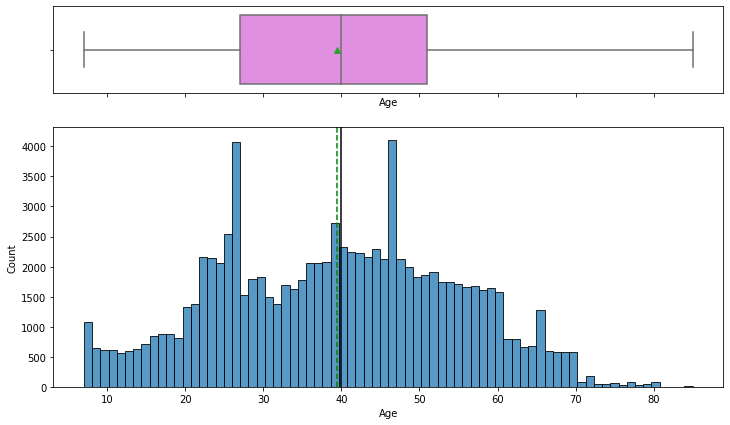

In [ ]:
histogram_boxplot(train_data,'Age')

The area of central tendency is ~39 with max age of 85. The Age is almost evenly distributed. There are no outliers in the Age distribution.

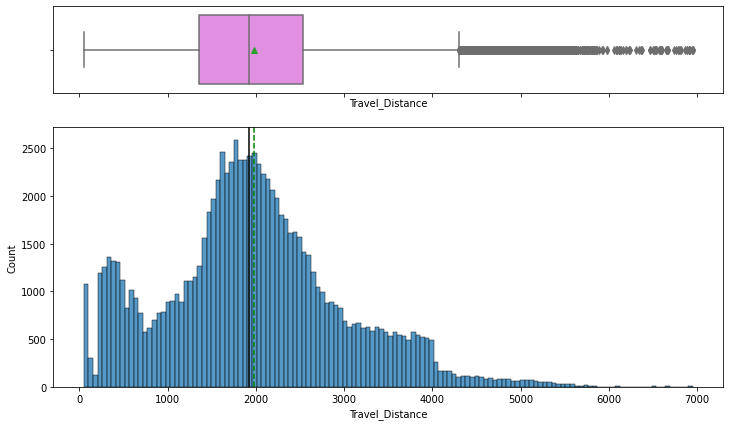

In [ ]:
histogram_boxplot(train_data, 'Travel_Distance')

- Although the travel distance is normally distributed, it is right-skewed which shows outliers that should be investigated expecially the outliers about 6000.

- We can see that the area of central tendency for Travel distance is 1923, despite a maximum value of over 6000

In [ ]:
# Function to create labeled barplots for categorical variables


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


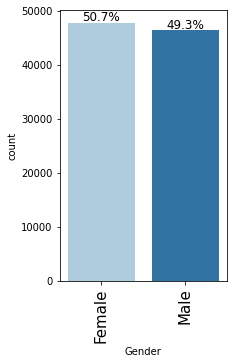

In [ ]:
labeled_barplot(train_data,'Gender')

- The distribution between male and female is rather close, therefore, the data is not gender skewed. This gender balance is very important to create machine learning models that are practically implemented on datasets related to people.

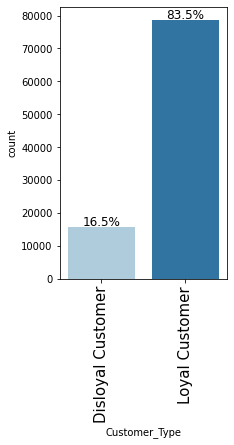

In [ ]:
labeled_barplot(train_data,'Customer_Type')

- There are more loyal customers than disloyal customers. 
- About 16.5% of the travellers are disployal. This travellers can be converted to loyal customers by improving some of the services

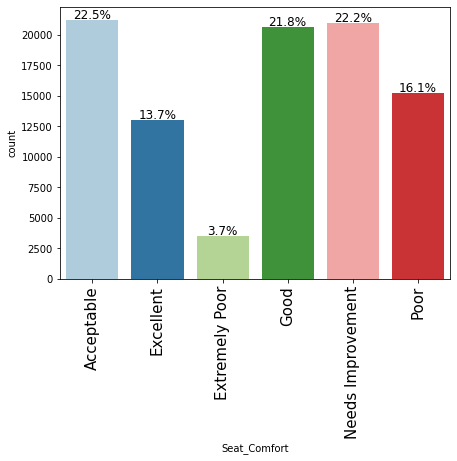

In [ ]:
labeled_barplot(train_data, 'Seat_Comfort')

Seat comfort is relatively good. There is about 22.2% seat that requires improvement. These can be converted to good, acceptable or excellent seats, thereby inceasing the comfortability of the seats.

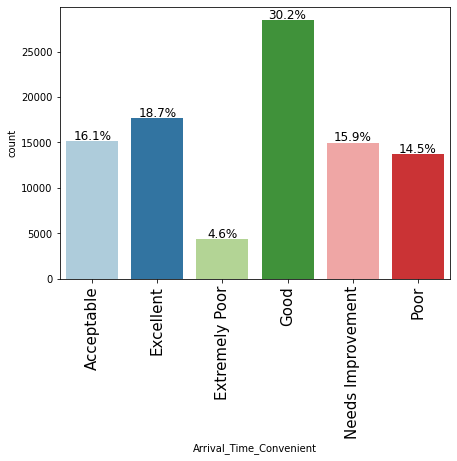

In [ ]:
labeled_barplot(train_data,'Arrival_Time_Convenient')

- The convenience of arrival time requires improvement to increase the % of acceptable/good/excellent arrival time

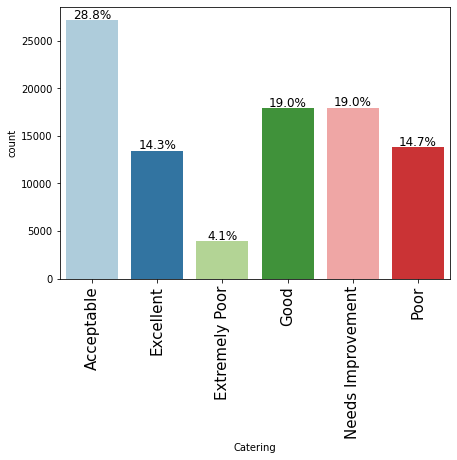

In [ ]:
labeled_barplot(train_data,'Catering')

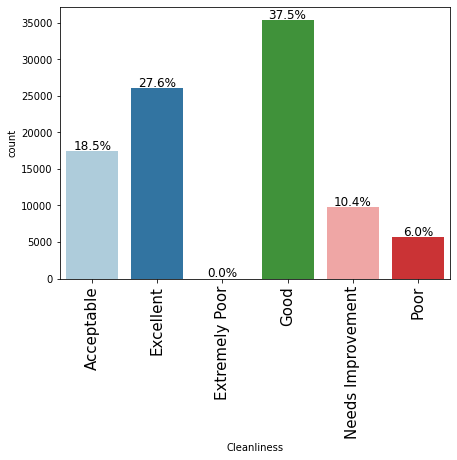

In [ ]:
labeled_barplot(train_data, 'Cleanliness')

- The train the considerably clean.

- Creating a pie chart for the target variable

1    51593
0    42786
Name: Overall_Experience, dtype: int64


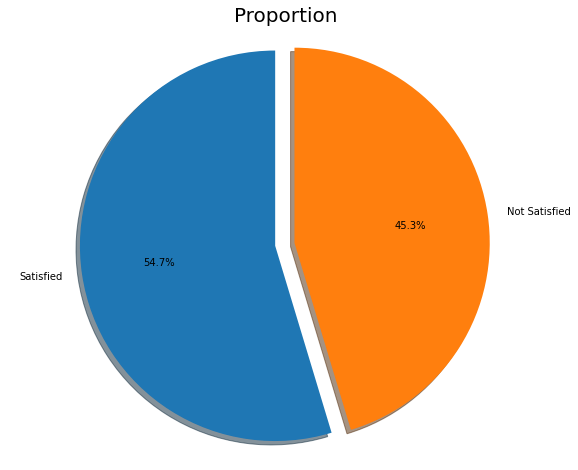

In [ ]:
print(train_data['Overall_Experience'].value_counts())
labels = 'Satisfied', 'Not Satisfied'
#sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [train_data.Overall_Experience[train_data['Overall_Experience']==1].count(),train_data.Overall_Experience[train_data['Overall_Experience']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()


* This pie chart shows that the actual distribution of classes is itself balanced for the target variable.
* 45% of the travellers are not satisfied.

Hence, this dataset and problem statement represent an example of balanced Classification.

### Encoding Categorical Columns

* We will be using the Label Encoding technique to encode the values of the categorical columns in this dataset.

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_RE = LabelEncoder()

In [ ]:
train_data['Type_Travel'] = labelencoder_RE.fit_transform(train_data['Type_Travel'])

In [ ]:
train_data['Customer_Type'] = labelencoder_RE.fit_transform(train_data['Customer_Type'])
train_data['Arrival_Time_Convenient'] = labelencoder_RE.fit_transform(train_data['Arrival_Time_Convenient'])
train_data['Catering'] = labelencoder_RE.fit_transform(train_data['Catering'])
train_data['Onboard_Service'] = labelencoder_RE.fit_transform(train_data['Onboard_Service'])
train_data['Baggage_Handling'] = labelencoder_RE.fit_transform(train_data['Baggage_Handling'])
train_data['Online_Support'] = labelencoder_RE.fit_transform(train_data['Online_Support'])
train_data['Legroom'] = labelencoder_RE.fit_transform(train_data['Legroom'])
train_data['CheckIn_Service'] = labelencoder_RE.fit_transform(train_data['CheckIn_Service'])
train_data['Gender'] = labelencoder_RE.fit_transform(train_data['Gender'])
train_data['Ease_of_Online_Booking'] = labelencoder_RE.fit_transform(train_data['Ease_of_Online_Booking'])
train_data['Seat_Comfort'] = labelencoder_RE.fit_transform(train_data['Seat_Comfort'])
train_data['Platform_Location'] = labelencoder_RE.fit_transform(train_data['Platform_Location'])
train_data['Onboard_Wifi_Service'] = labelencoder_RE.fit_transform(train_data['Onboard_Wifi_Service'])
train_data['Onboard_Entertainment'] = labelencoder_RE.fit_transform(train_data['Onboard_Entertainment'])
train_data['Cleanliness'] = labelencoder_RE.fit_transform(train_data['Cleanliness'])
train_data['Online_Boarding'] = labelencoder_RE.fit_transform(train_data['Online_Boarding'])

In [ ]:
train_data['Travel_Class'] = labelencoder_RE.fit_transform(train_data['Travel_Class'])

In [ ]:
train_data['Seat_Class'] = labelencoder_RE.fit_transform(train_data['Seat_Class'])

               

### Encoding the test data

In [ ]:
test_data['Type_Travel'] = labelencoder_RE.fit_transform(test_data['Type_Travel'])
test_data['Customer_Type'] = labelencoder_RE.fit_transform(test_data['Customer_Type'])
test_data['Arrival_Time_Convenient'] = labelencoder_RE.fit_transform(test_data['Arrival_Time_Convenient'])
test_data['Catering'] = labelencoder_RE.fit_transform(test_data['Catering'])
test_data['Onboard_Service'] = labelencoder_RE.fit_transform(test_data['Onboard_Service'])
test_data['Baggage_Handling'] = labelencoder_RE.fit_transform(test_data['Baggage_Handling'])
test_data['Online_Support'] = labelencoder_RE.fit_transform(test_data['Online_Support'])
test_data['Legroom'] = labelencoder_RE.fit_transform(test_data['Legroom'])
test_data['CheckIn_Service'] = labelencoder_RE.fit_transform(test_data['CheckIn_Service'])
test_data['Gender'] = labelencoder_RE.fit_transform(test_data['Gender'])
test_data['Ease_of_Online_Booking'] = labelencoder_RE.fit_transform(test_data['Ease_of_Online_Booking'])
test_data['Seat_Comfort'] = labelencoder_RE.fit_transform(test_data['Seat_Comfort'])
test_data['Platform_Location'] = labelencoder_RE.fit_transform(test_data['Platform_Location'])
test_data['Onboard_Wifi_Service'] = labelencoder_RE.fit_transform(test_data['Onboard_Wifi_Service'])
test_data['Onboard_Entertainment'] = labelencoder_RE.fit_transform(test_data['Onboard_Entertainment'])
test_data['Cleanliness'] = labelencoder_RE.fit_transform(test_data['Cleanliness'])
test_data['Online_Boarding'] = labelencoder_RE.fit_transform(test_data['Online_Boarding'])
test_data['Travel_Class'] = labelencoder_RE.fit_transform(test_data['Travel_Class'])
test_data['Seat_Class'] = labelencoder_RE.fit_transform(test_data['Seat_Class'])

In [ ]:
train_data.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,0,1,52.0,0,0,272.0,0.0,5.0,0,4,...,3,4,0,4,4,0,3,3,4,5
1,1,1,48.0,1,1,2200.0,9.0,0.0,0,5,...,3,5,3,3,1,4,4,4,3,3
2,0,1,43.0,0,0,1061.0,77.0,119.0,1,4,...,4,3,1,1,1,1,1,3,1,1
3,0,1,44.0,0,0,780.0,13.0,18.0,0,0,...,0,4,0,0,0,0,0,3,0,0
4,0,1,50.0,0,0,1981.0,0.0,0.0,1,0,...,4,3,1,3,3,3,2,3,3,3


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94379 non-null  int64  
 1   Customer_Type            94379 non-null  int64  
 2   Age                      94379 non-null  float64
 3   Type_Travel              94379 non-null  int64  
 4   Travel_Class             94379 non-null  int64  
 5   Travel_Distance          94379 non-null  float64
 6   Departure_Delay_in_Mins  94379 non-null  float64
 7   Arrival_Delay_in_Mins    94379 non-null  float64
 8   Overall_Experience       94379 non-null  int64  
 9   Seat_Comfort             94379 non-null  int64  
 10  Seat_Class               94379 non-null  int64  
 11  Arrival_Time_Convenient  94379 non-null  int64  
 12  Catering                 94379 non-null  int64  
 13  Platform_Location        94379 non-null  int64  
 14  Onboard_Wifi_Service  

### Split the train data with train_test_split into train and test data

In [ ]:
X = train_data.drop(['Overall_Experience'],axis = 1)
y = train_data['Overall_Experience']

In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Overall_Experience, dtype: int64

In [ ]:
X_train, X_test,  y_train,y_test = train_test_split(X,y, test_size = 0.3,random_state = 42)

In [ ]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(66065, 23)
(28314, 23)
(66065,)
(28314,)


## **Model Evaluation Criterion**

#### **Model can make wrong predictions as:**

1. Predicting a traveller is satisfied with their travel experience but in reality, the customer is not satisfied. i.e predicting a 1 but actual is 0 (False Positive)
2. Predicting a traveller is not satisfied with their travel experience but in reality, the customer is satisfied. i.e predicting a 0 but actual is 1 (False negative)

#### **Which case is more important?** 

Both the cases are important as:



* If we predict that a traveller is not satisfied but he is actually satisfied, the company will lose resources utilized to ensure the traveller is satified.

* If we predict that a traveller is satified but he is not actually satified,  the company might ignore the client and might not be able to provide satisfactory services to the customer by assuming that the traveller is satisfied. This might damage brand reputation and equity. 



#### **How to reduce the losses?**

* Shinkansen Bullet Train would want the `F1 Score` to be maximized, the greater the F1  score, the higher the chances of minimizing False Negatives and False Positives. 

### Model 1


In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = X_train.shape[1], units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid')) 

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1536      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
1652/1652 [==============================] - 3s 2ms/step - loss: 75.3382 - accuracy: 0.5425 - val_loss: 0.6911 - val_accuracy: 0.5448
Epoch 2/50
1652/1652 [==============================] - 3s 2ms/step - loss: 0.6920 - accuracy: 0.5428 - val_loss: 0.6892 - val_accuracy: 0.5448
Epoch 3/50
1652/1652 [==============================] - 2s 1ms/step - loss: 0.6895 - accuracy: 0.5428 - val_loss: 0.6891 - val_accuracy: 0.5448
Epoch 4/50
1652/1652 [==============================] - 3s 2ms/step - loss: 0.6895 - accuracy: 0.5428 - val_loss: 0.6892 - val_accuracy: 0.5448
Epoch 5/50
1652/1652 [==============================] - 3s 2ms/step - loss: 0.6895 - accuracy: 0.5428 - val_loss: 0.6892 - val_accuracy: 0.5448
Epoch 6/50
1652/1652 [==============================] - 2s 1ms/step - loss: 0.6895 - accuracy: 0.5428 - val_loss: 0.6891 - val_accuracy: 0.5448
Epoch 7/50
1652/1652 [==============================] - 3s 2ms/step - loss: 0.6895 - accuracy: 0.5428 - val_loss: 0.6891 - val_accuracy

885/885 [==============================] - 1s 1ms/step - loss: 0.6876 - accuracy: 0.5547


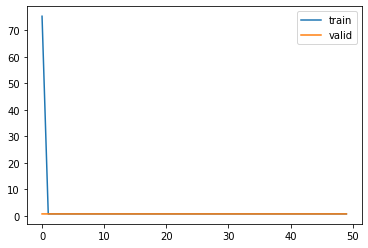

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

In [ ]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

885/885 [==============================] - 1s 827us/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    if title:
        plt.title(title)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     12608
           1       0.55      1.00      0.71     15706

    accuracy                           0.55     28314
   macro avg       0.78      0.50      0.36     28314
weighted avg       0.75      0.55      0.40     28314



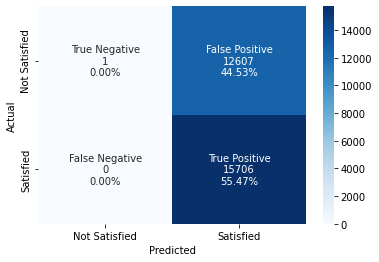

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- Here, the 0.00% of False Negatives is because we gave 0.5 as the threshold to the model. this model predicted that every traveller is satisfied which is not correct. About 44% is False positive which means the model predicted travellers are satisfied when they actually are not
- The accuracy here is 0.55%, although the f1 score is good at 71%

Let's try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyperparameters accordingly, in order to improve the model's performance.

### MODEL 2

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6144      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 49,409
Trainable params: 49,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
826/826 [==============================] - 3s 3ms/step - loss: 7.3518 - accuracy: 0.5342 - val_loss: 2.0135 - val_accuracy: 0.5566
Epoch 2/50
826/826 [==============================] - 2s 2ms/step - loss: 1.6096 - accuracy: 0.5755 - val_loss: 7.7982 - val_accuracy: 0.4570
Epoch 3/50
826/826 [==============================] - 2s 3ms/step - loss: 1.0210 - accuracy: 0.5979 - val_loss: 0.5928 - val_accuracy: 0.6888
Epoch 4/50
826/826 [==============================] - 2s 2ms/step - loss: 0.7645 - accuracy: 0.6253 - val_loss: 0.9346 - val_accuracy: 0.5684
Epoch 5/50
826/826 [==============================] - 2s 3ms/step - loss: 1.2810 - accuracy: 0.6075 - val_loss: 0.7455 - val_accuracy: 0.5433
Epoch 6/50
826/826 [==============================] - 2s 2ms/step - loss: 0.6495 - accuracy: 0.6334 - val_loss: 0.6027 - val_accuracy: 0.6859
Epoch 7/50
826/826 [==============================] - 2s 2ms/step - loss: 0.6476 - accuracy: 0.6387 - val_loss: 0.7160 - val_accuracy: 0.5433
Epoch 

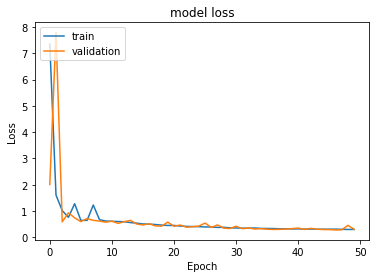

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As we increased the depth of the neural network and changed the optimizer to Adam, we can see smoother loss curves for both train and validation.

885/885 [==============================] - 1s 1ms/step
Best Threshold=0.737252, G-Mean=0.880


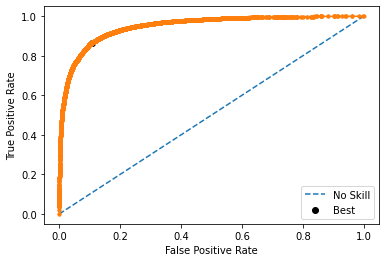

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

885/885 [==============================] - 1s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

              precision    recall  f1-score   support

           0       0.84      0.89      0.87     12608
           1       0.91      0.87      0.89     15706

    accuracy                           0.88     28314
   macro avg       0.88      0.88      0.88     28314
weighted avg       0.88      0.88      0.88     28314



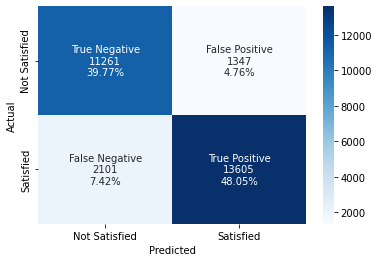

In [ ]:
classification_report,
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_pred_e1))
cm1=confusion_matrix(y_test, y_pred_e1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- The model improved significantly compared with model 1 with an accuracy of 88% as against 55% of model 1. f1 score improved significantly as well from 71% to 89%. The model is not overfitting and well generalized.
- As the number of layers in the neural network has increased, we can see that the macro F1 score has increased, and the False positive percentage has decreased. 

Now let's try to use the Batch Normalization technique and check to see if we can increase the F1 score. 

### MODEL 3

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3072      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
826/826 [==============================] - 3s 3ms/step - loss: 0.5863 - accuracy: 0.6871 - val_loss: 0.7174 - val_accuracy: 0.6114
Epoch 2/50
826/826 [==============================] - 2s 2ms/step - loss: 0.4739 - accuracy: 0.7767 - val_loss: 0.5254 - val_accuracy: 0.7438
Epoch 3/50
826/826 [==============================] - 2s 2ms/step - loss: 0.4166 - accuracy: 0.8122 - val_loss: 0.5586 - val_accuracy: 0.7542
Epoch 4/50
826/826 [==============================] - 2s 2ms/step - loss: 0.3755 - accuracy: 0.8349 - val_loss: 1.1080 - val_accuracy: 0.6077
Epoch 5/50
826/826 [==============================] - 2s 2ms/step - loss: 0.3482 - accuracy: 0.8482 - val_loss: 1.1239 - val_accuracy: 0.6267
Epoch 6/50
826/826 [==============================] - 2s 2ms/step - loss: 0.3328 - accuracy: 0.8547 - val_loss: 0.4863 - val_accuracy: 0.7733
Epoch 7/50
826/826 [==============================] - 2s 2ms/step - loss: 0.3207 - accuracy: 0.8619 - val_loss: 0.5221 - val_accuracy: 0.7413
Epoch 

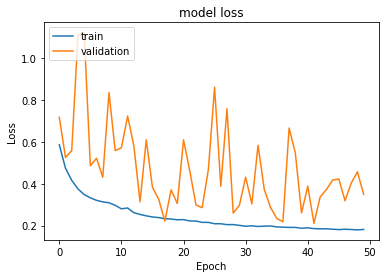

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Unfortunately, from the above plot we observe that there is a lot of noise in the model, and it and seems to have overfitted on the training data because there is a significant difference in performance between train and validation.

885/885 [==============================] - 1s 964us/step
Best Threshold=0.240044, G-Mean=0.883


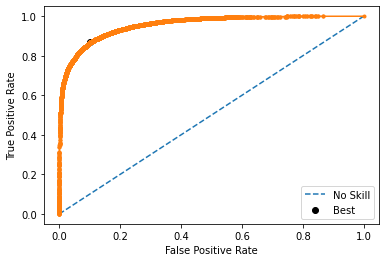

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

885/885 [==============================] - 1s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

              precision    recall  f1-score   support

           0       0.85      0.90      0.87     12608
           1       0.91      0.87      0.89     15706

    accuracy                           0.88     28314
   macro avg       0.88      0.88      0.88     28314
weighted avg       0.88      0.88      0.88     28314



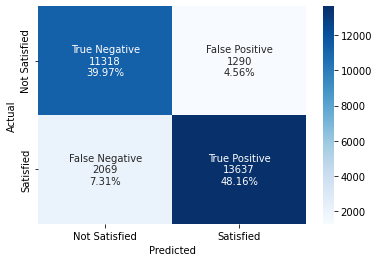

In [ ]:
classification_report,
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_pred_e2))
cm2=confusion_matrix(y_test, y_pred_e2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

The Train and Validation curves seem to show overfitting despite having a good F1 score and a low False Negative rate. 

Let's try to use the Dropout technique and check to see if it can reduce the False Negative rate. 

### Model 4

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6144      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
826/826 [==============================] - 3s 3ms/step - loss: 1.3419 - accuracy: 0.5315 - val_loss: 0.6892 - val_accuracy: 0.5448
Epoch 2/50
826/826 [==============================] - 2s 3ms/step - loss: 0.6918 - accuracy: 0.5425 - val_loss: 0.6891 - val_accuracy: 0.5448
Epoch 3/50
826/826 [==============================] - 2s 3ms/step - loss: 0.6905 - accuracy: 0.5425 - val_loss: 0.6892 - val_accuracy: 0.5448
Epoch 4/50
826/826 [==============================] - 2s 3ms/step - loss: 0.6900 - accuracy: 0.5427 - val_loss: 0.6892 - val_accuracy: 0.5448
Epoch 5/50
826/826 [==============================] - 2s 3ms/step - loss: 0.6902 - accuracy: 0.5427 - val_loss: 0.6891 - val_accuracy: 0.5448
Epoch 6/50
826/826 [==============================] - 3s 3ms/step - loss: 0.6900 - accuracy: 0.5430 - val_loss: 0.6891 - val_accuracy: 0.5448
Epoch 7/50
826/826 [==============================] - 3s 3ms/step - loss: 0.6896 - accuracy: 0.5428 - val_loss: 0.6891 - val_accuracy: 0.5448
Epoch 

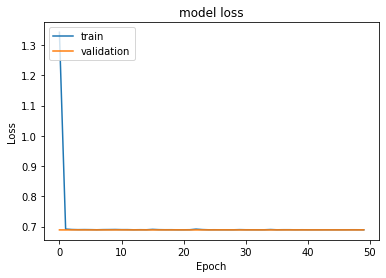

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Model 5

#### **Random Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model_v4(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We are using Random search to optimize two hyperparameters - **Batch size** & **Learning Rate**.

You can also optimize other hyperparameters as mentioned above.

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [ ]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
1652/1652 [==============================] - 5s 2ms/step - loss: 12.6216 - accuracy: 0.5353 - val_loss: 0.6912 - val_accuracy: 0.5448
Best: 0.543223 using {'lr': 0.1, 'batch_size': 32}


The best model is with the following configuration: 

( It may vary each time the code runs ) 

**Result of Random Search**

{'batch_size': 32, 'learning_rate": 0.01}

Let's create the final model with the above mentioned configuration

In [ ]:
estimator_v4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               6144      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [ ]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
826/826 [==============================] - 3s 3ms/step - loss: 58.0966 - accuracy: 0.5383 - val_loss: 0.6892 - val_accuracy: 0.5448
Epoch 2/50
826/826 [==============================] - 2s 3ms/step - loss: 0.7230 - accuracy: 0.5379 - val_loss: 0.6904 - val_accuracy: 0.5448
Epoch 3/50
826/826 [==============================] - 2s 3ms/step - loss: 0.6906 - accuracy: 0.5407 - val_loss: 0.6893 - val_accuracy: 0.5448
Epoch 4/50
826/826 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5369 - val_loss: 0.6901 - val_accuracy: 0.5448
Epoch 5/50
826/826 [==============================] - 2s 3ms/step - loss: 0.6907 - accuracy: 0.5400 - val_loss: 0.6891 - val_accuracy: 0.5448
Epoch 6/50
826/826 [==============================] - 2s 3ms/step - loss: 0.6910 - accuracy: 0.5375 - val_loss: 0.6936 - val_accuracy: 0.5448
Epoch 7/50
826/826 [==============================] - 2s 3ms/step - loss: 0.6910 - accuracy: 0.5376 - val_loss: 0.6901 - val_accuracy: 0.5448
Epoch

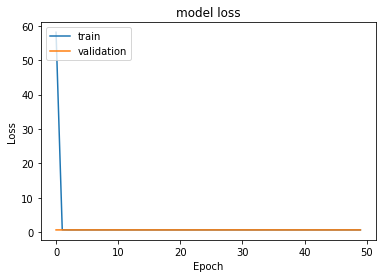

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is noise in the training behavior of the model.

885/885 [==============================] - 1s 939us/step
Best Threshold=1.556131, G-Mean=0.000


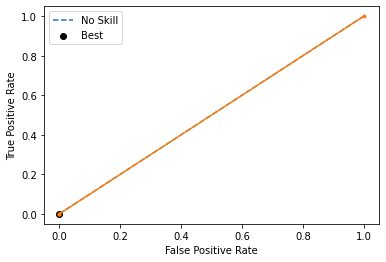

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

### Keras Tuner

In [ ]:
## Install Keras Tuner
!pip install keras-tuner 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Hyperparameters**
* How many hidden layers should the model have?
* How many neurons should the model have in each hidden layer?
* Learning Rate

In [ ]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

Initialize a tuner (here, RandomSearch). We use objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.


In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [ ]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

In [ ]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in ./Job_
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.7158101995786031
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.7073588967323303
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.6891949971516927
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.6089709798494974
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_

##Model 6

* Let's create a model with the above mentioned best configuration given by Keras Tuner.

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model7 = Sequential()
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               3840      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 123,585
Trainable params: 123,585
Non-trai

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history_7 = model7.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
826/826 [==============================] - 5s 5ms/step - loss: 7.4929 - accuracy: 0.5338 - val_loss: 0.6686 - val_accuracy: 0.6150
Epoch 2/50
826/826 [==============================] - 5s 6ms/step - loss: 0.8733 - accuracy: 0.5718 - val_loss: 0.7913 - val_accuracy: 0.5651
Epoch 3/50
826/826 [==============================] - 5s 6ms/step - loss: 0.7978 - accuracy: 0.5669 - val_loss: 0.6981 - val_accuracy: 0.5632
Epoch 4/50
826/826 [==============================] - 6s 7ms/step - loss: 0.6676 - accuracy: 0.6039 - val_loss: 0.7104 - val_accuracy: 0.5190
Epoch 5/50
826/826 [==============================] - 5s 7ms/step - loss: 0.6765 - accuracy: 0.6093 - val_loss: 0.7759 - val_accuracy: 0.5460
Epoch 6/50
826/826 [==============================] - 4s 5ms/step - loss: 0.6647 - accuracy: 0.6266 - val_loss: 0.5904 - val_accuracy: 0.6913
Epoch 7/50
826/826 [==============================] - 3s 3ms/step - loss: 0.6474 - accuracy: 0.6412 - val_loss: 0.6087 - val_accuracy: 0.6799
Epoch 

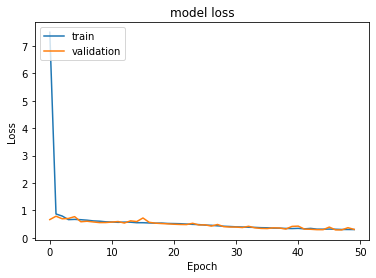

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

885/885 [==============================] - 1s 1ms/step
Best Threshold=0.745447, G-Mean=0.879


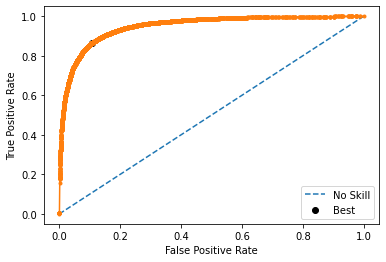

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = model7.predict(X_test)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e7=model7.predict(X_test)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

885/885 [==============================] - 1s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

              precision    recall  f1-score   support

           0       0.84      0.89      0.87     12608
           1       0.91      0.87      0.89     15706

    accuracy                           0.88     28314
   macro avg       0.88      0.88      0.88     28314
weighted avg       0.88      0.88      0.88     28314



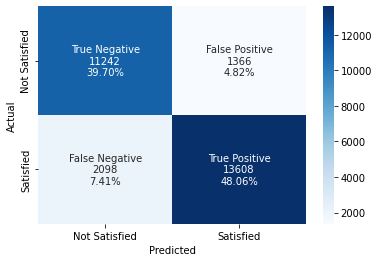

In [ ]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_pred_e7))
cm7=confusion_matrix(y_test, y_pred_e7)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Satisfied','Satisfied']
make_confusion_matrix(cm7, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')



* Model 2 had accuracy of 88% with f1 score of 89%
* Model 6 has accuracy of 88% with f1 score of 89%
* Model 6, which uses Keras tuner has the best model performance

In [ ]:
test = test_data.copy()

In [ ]:
test_data.drop('ID',axis = 1, inplace = True)

testing the model on our test_data with model 2

In [ ]:
y_pred_test=model2.predict(test_data)
y_pred_test = (y_pred_test > thresholds2[ix])
y_pred_test

1113/1113 [==============================] - 1s 1ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
y_pred_test.size

35602

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/Machine Learning/Classification/Hackathon/Sample_Submission.csv')

In [ ]:
y_result = pd.DataFrame(y_pred_test, columns = ['Overall_Experience'])

In [ ]:
y_result.head()

,Overall_Experience
0,True
1,True
2,True
3,False
4,True


In [ ]:
y_result['Overall_Experience'] = y_result['Overall_Experience'].map({True:'True',False:'False'})

In [ ]:
y_result['Overall_Experience'] = y_result['Overall_Experience'].map({'True':1,'False':0})

In [ ]:
y_result.head()

,Overall_Experience
0,1
1,1
2,1
3,0
4,1


In [ ]:
test.columns

Index(['ID', 'Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')

In [ ]:
test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,0,1,36.0,0,0,532.0,0.0,0.0,0,...,4,1,2,1,1,1,1,2,1,5
1,99900002,0,0,21.0,0,0,1425.0,9.0,28.0,2,...,0,5,0,0,1,0,2,0,1,0
2,99900003,1,1,60.0,0,0,2832.0,0.0,0.0,1,...,1,1,1,4,3,4,3,2,3,1
3,99900004,0,1,29.0,1,1,1352.0,0.0,0.0,0,...,5,0,1,5,0,4,1,1,1,5
4,99900005,1,0,18.0,0,0,1610.0,17.0,0.0,1,...,1,1,1,1,2,0,1,1,1,1


In [ ]:
new = pd.DataFrame(test.ID)

In [ ]:
new.head()

,ID
0,99900001
1,99900002
2,99900003
3,99900004
4,99900005


In [ ]:
submit = pd.concat([new,y_result], axis = 1)

In [ ]:
submit.count()

ID                    35602
Overall_Experience    35602
dtype: int64

In [ ]:
submit_format = pd.read_csv('/content/drive/MyDrive/Machine Learning/Classification/Hackathon/Sample_Submission.csv')

In [ ]:
submit_format.head()

,ID,Overall_Experience
0,99900001,1
1,99900002,0
2,99900003,0
3,99900004,0
4,99900005,1


In [ ]:
submit.head()

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1


In [ ]:
submit.to_csv('/content/drive/MyDrive/Machine Learning/Classification/Hackathon/submission1.csv', index=False)

testing the model on our test_data with model 7

In [ ]:
y_pred_test=model7.predict(test_data)
y_pred_test = (y_pred_test > thresholds7[ix])
y_pred_test

1113/1113 [==============================] - 2s 2ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
y_result_7 = pd.DataFrame(y_pred_test, columns = ['Overall_Experience'])

In [ ]:
y_result_7['Overall_Experience'] = y_result_7['Overall_Experience'].map({True:'True',False:'False'})

In [ ]:
y_result_7['Overall_Experience'] = y_result_7['Overall_Experience'].map({'True':1,'False':0})

In [ ]:
submit_7 = pd.concat([new,y_result_7], axis = 1)

In [ ]:
submit_7.to_csv('/content/drive/MyDrive/Machine Learning/Classification/Hackathon/submission2.csv', index = False)